In [200]:
import numpy as np
import pandas as pd
from datetime import datetime as dt

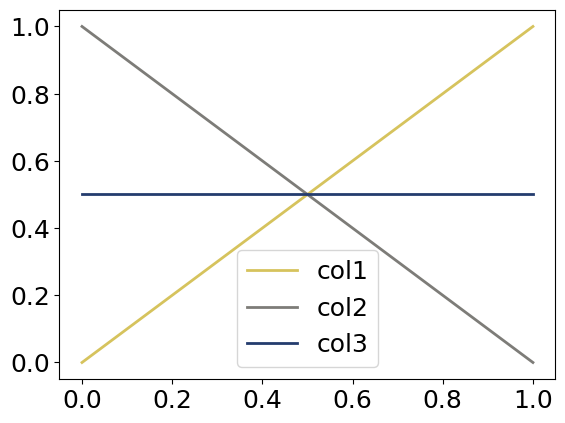

In [2]:
#plot settings
font = {'family': 'sans-serif', 'size': 18}
plt.rc('font', **font)
lw = 2. #linewidth for all plots

col_map = cm.cividis
norm = Normalize(vmin=-10, vmax=10)
col1 = col_map(norm(7))
col2 = col_map(norm(0))
col3 = col_map(norm(-7))

plt.figure()
plt.plot([0, 1], [0, 1], color=col1, label='col1', linewidth = lw)
plt.plot([0, 1], [1, 0], color=col2, label='col2', linewidth = lw)
plt.plot([0, 1], [.5, .5], color=col3, label='col3', linewidth = lw)
plt.legend();

### Get data: inflation, approval rating, unemployment rate, etc.

In [201]:
#inflation data
df = pd.read_csv('all_US_inflation_rates.csv')
header = df.iloc[0]
df_inf = df[1:]
df_inf.columns = header

df_inf = df_inf.rename(columns = {'Year': 'year'})
df_inf = df_inf.melt(id_vars=['year'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], \
                            var_name='month', value_name='inflation')
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,\
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_inf['month'] = df_inf['month'].map(month_map)
df_inf['month'] = df_inf['month'].apply(lambda x: float(x) if not pd.isna(x) else x) #convert to float (we will switch back later) but also take care of NaNs
df_inf['year'] = df_inf['year'].apply(lambda x: float(x) if not pd.isna(x) else x) #convert to float (we will switch back later) but also take care of NaNs

df_inf.head()

,year,month,inflation
0,1914.0,1.0,2
1,1915.0,1.0,1
2,1916.0,1.0,3
3,1917.0,1.0,12.5
4,1918.0,1.0,19.7


In [202]:
#approval ratings
df = pd.read_csv('all_approval_ratings.csv')
header = df.iloc[0]
df_app = df[1:]
df_app.columns = header
df_app.head()

,Start Date,End Date,Approving,Disapproving,Unsure/NoData,President
1,6/3/2024,6/23/2024,38,58,4,Biden
2,5/1/2024,5/23/2024,39,56,5,Biden
3,4/1/2024,4/22/2024,38,58,4,Biden
4,3/1/2024,3/20/2024,40,55,5,Biden
5,2/1/2024,2/20/2024,38,59,3,Biden


In [203]:
#unemployment rates
df = pd.read_csv('all_unemployment.csv')
header = df.iloc[10]
df_unemp = df[11:]
df_unemp.columns = header

df_unemp = df_unemp.rename(columns = {'Year': 'year'})
df_unemp = df_unemp.melt(id_vars=['year'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], \
                            var_name='month', value_name='unemployment')
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,\
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_unemp['month'] = df_unemp['month'].map(month_map)
df_unemp['month'] = df_unemp['month'].apply(lambda x: float(x) if not pd.isna(x) else x) #convert to float (we will switch back later) but also take care of NaNs
df_unemp['year'] = df_unemp['year'].apply(lambda x: float(x) if not pd.isna(x) else x) #convert to float (we will switch back later) but also take care of NaNs

df_unemp.tail()

,year,month,unemployment
919,2020.0,12.0,6.7
920,2021.0,12.0,3.9
921,2022.0,12.0,3.5
922,2023.0,12.0,3.7
923,2024.0,12.0,NaN


In [204]:
#next, consumer price index (CPI)
df = pd.read_csv('all_CPI_rates.csv')
df = df.rename(columns = {'Year': 'year'})
df_cpi = df.drop(['Avg', 'Dec-Dec', 'Avg-Avg'], axis=1)
df_cpi = df_cpi.melt(id_vars=['year'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], \
                            var_name='month', value_name='CPI')
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,\
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_cpi['month'] = df_cpi['month'].map(month_map)

df_cpi.head()

,year,month,CPI
0,1913,1.0,9.8
1,1914,1.0,10.0
2,1915,1.0,10.1
3,1916,1.0,10.4
4,1917,1.0,11.7


In [205]:
#interest rates (https://fred.stlouisfed.org/series/FEDFUNDS)
df_int = pd.read_csv('all_interest.csv')
df_int['year'] = pd.to_datetime(df_int['DATE']).dt.year
df_int['month'] = pd.to_datetime(df_int['DATE']).dt.month
df_int.head()

,DATE,FEDFUNDS,year,month
0,1954-07-01,0.80,1954,7
1,1954-08-01,1.22,1954,8
2,1954-09-01,1.07,1954,9
3,1954-10-01,0.85,1954,10
4,1954-11-01,0.83,1954,11


In [206]:
#political polarization in congress (https://www.kaggle.com/datasets/justin2028/political-polarization-in-us-congress)
df_ppol = pd.read_csv('all_ppol.csv')
df = pd.DataFrame()

df_ppol_house = df_ppol[df_ppol['chamber']=='House']
df_ppol_senate = df_ppol[df_ppol['chamber']=='Senate']
df_ppol_house = df_ppol_house[['year', 'party.mean.diff.d1']].rename(columns={'party.mean.diff.d1': 'house_pol'})
df_ppol_senate = df_ppol_senate[['year', 'party.mean.diff.d1']].rename(columns={'party.mean.diff.d1': 'senate_pol'})
df_pol = pd.merge(df_ppol_house, df_ppol_senate, on='year', how='outer') #outer join

df_pol.head()

,year,house_pol,senate_pol
0,1879,0.785883,0.747943
1,1881,0.782714,0.763571
2,1883,0.724404,0.760469
3,1885,0.749321,0.743887
4,1887,0.764893,0.747413


### Finally, create the main dataframe to be used for analysis
Assign each inflation, CPI, unemployment data point to a President (by checking if it's within that president's min and max date)
This is done by doing a left join using month and year as intersection. 

In [207]:
years = np.repeat(np.arange(1914, 2025), 12)
months = np.tile(np.arange(1, 13), 111)

df_pres = pd.DataFrame({'year': years, 'month': months})

#inflation
df_pres = pd.merge(df_pres, df_inf[['year', 'month', 'inflation']], on=['year', 'month'], how='left') #left join

#interest rates
df_pres = pd.merge(df_pres, df_int[['year', 'month', 'FEDFUNDS']], on=['year', 'month'], how='left')
df_pres.rename(columns={'FEDFUNDS': 'interest'}, inplace=True)

#unemployment
df_pres = pd.merge(df_pres, df_unemp[['year', 'month', 'unemployment']], on=['year', 'month'], how='left')

#CPI
df_pres = pd.merge(df_pres, df_cpi[['year', 'month', 'CPI']], on=['year', 'month'], how='left')

#political polarization
df_pres = pd.merge(df_pres, df_pol[['year', 'senate_pol']], on='year', how='left')
df_pres = pd.merge(df_pres, df_pol[['year', 'house_pol']], on='year', how='left')

#president's approval ratings and identity, etc.
df_app['Start Date'] = pd.to_datetime(df_app['Start Date'], format='%m/%d/%Y', errors='coerce')
df_app['End Date'] = pd.to_datetime(df_app['End Date'], format='%m/%d/%Y', errors='coerce')
df_app['Midpoint'] = df_app[['Start Date', 'End Date']].mean(axis=1)
df_app['year'] = df_app['Midpoint'].dt.year
df_app['month'] = df_app['Midpoint'].dt.month
#now, we can do a left join
df_pres = pd.merge(df_pres, df_app[['year', 'month', 'Approving', 'Disapproving', 'President']],\
                   left_on=['year', 'month'], right_on=['year', 'month'], how='left')
df_pres.rename(columns={'Approving': 'approval', 'Disapproving': 'disapproval', 'President': 'president'}, inplace=True)

print(df_pres.iloc[2*len(df_pres)//4])

df_pres.to_csv('df_pres.csv', index=False)

year                     1991
month                       1
inflation                 5.7
interest                 6.91
unemployment              6.4
CPI                     134.6
senate_pol           0.618786
house_pol            0.658964
approval                   58
disapproval                31
president       G. H. W. Bush
Name: 1170, dtype: object
